In [17]:
# Import the required library
import pandas as pd
import numpy as np

# Read the csv file
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Spotify_Youtube.csv")

# Show the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Show the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(df.tail())

# Basic info on the dataset
print("\nBasic info on the dataset:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


First 5 rows of the dataset:
   Unnamed: 0    Artist                                        Url_spotify   
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...  \
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track   
0                                 Feel Good Inc.  \
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type   
0                                     Demon Days      album  \
1                                  Plastic Beach      album   


In [18]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [19]:
# List of required columns
required_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
                   'Duration_ms', 'Stream']

# Filter the DataFrame
df_filtered = df[required_columns]

# Show the first 5 rows of the filtered dataset
print(df_filtered.head())


   Danceability  Energy   Key  Loudness  Speechiness  Acousticness   
0         0.818   0.705   6.0    -6.679       0.1770      0.008360  \
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms        Stream  
0          0.002330    0.6130    0.772  138.559     222640.0  1.040235e+09  
1          0.000687    0.0463    0.852   92.761     200173.0  3.100837e+08  
2          0.046900    0.1160    0.551  108.014     215150.0  6.306347e+07  
3          0.509000    0.0640    0.578  120.423     233867.0  4.346636e+08  
4          0.000000    0.0698    0.525  167.953     340920.0  6.172597e+08  


Missing data for each column:
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Stream              576
dtype: int64

Summary statistics for each column:
       Danceability        Energy           Key      Loudness   Speechiness   
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000  \
mean       0.619777      0.635250      5.300348     -7.671680      0.096456   
std        0.165272      0.214147      3.576449      4.632749      0.111960   
min        0.000000      0.000020      0.000000    -46.251000      0.000000   
25%        0.518000      0.507000      2.000000     -8.858000      0.035700   
50%        0.637000      0.666000      5.000000     -6.536000      0.050500   
75%        0.740250      0.798000      8.000000     -4.931000      0.103000   


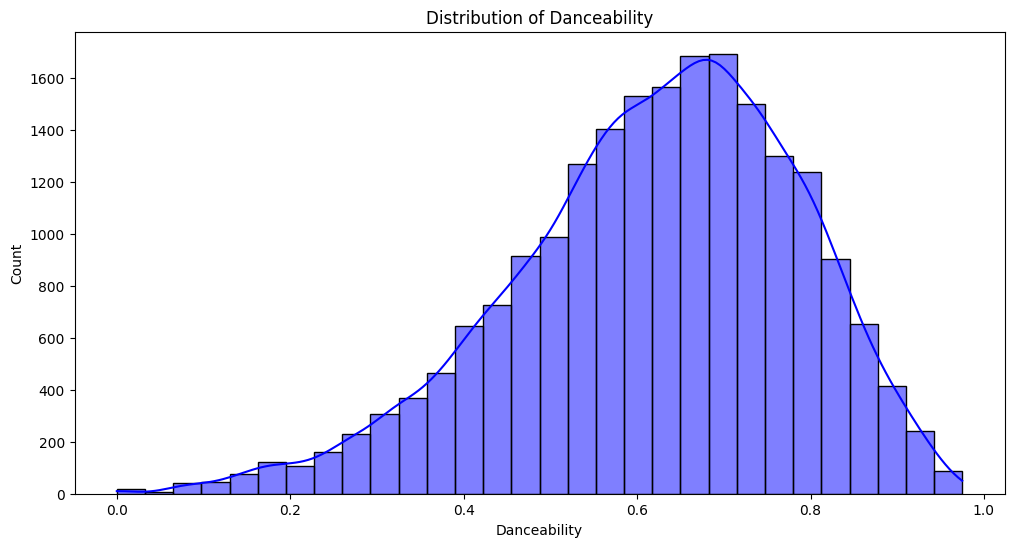

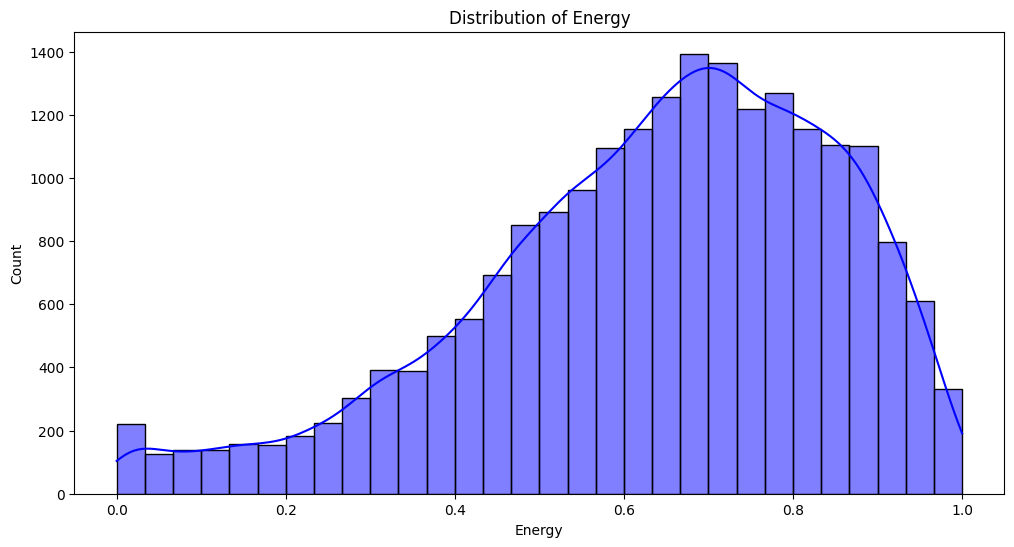

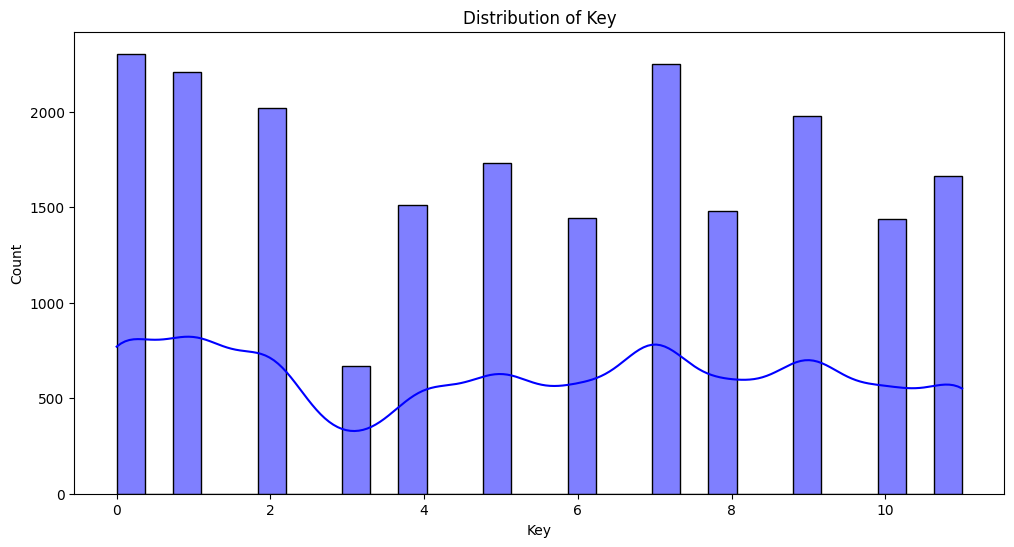

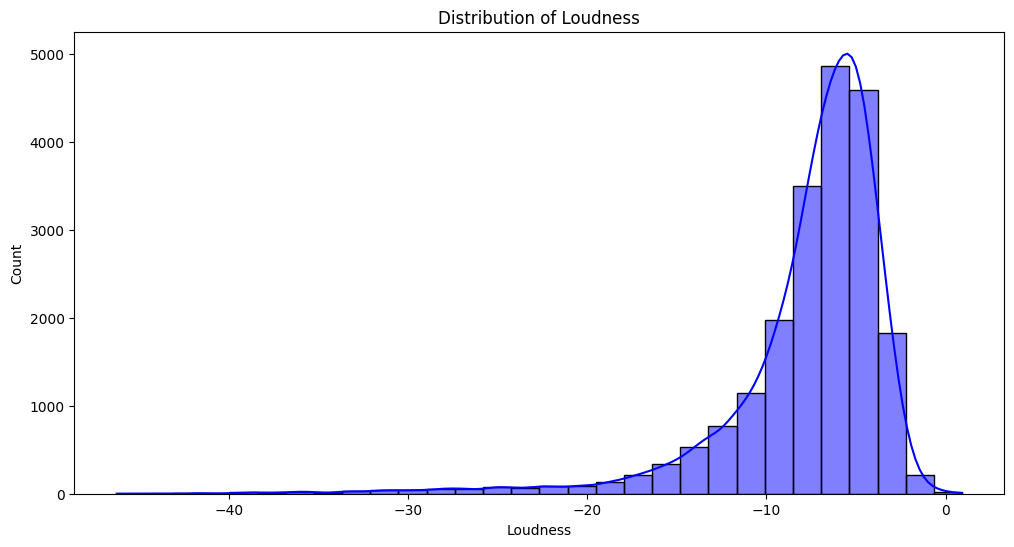

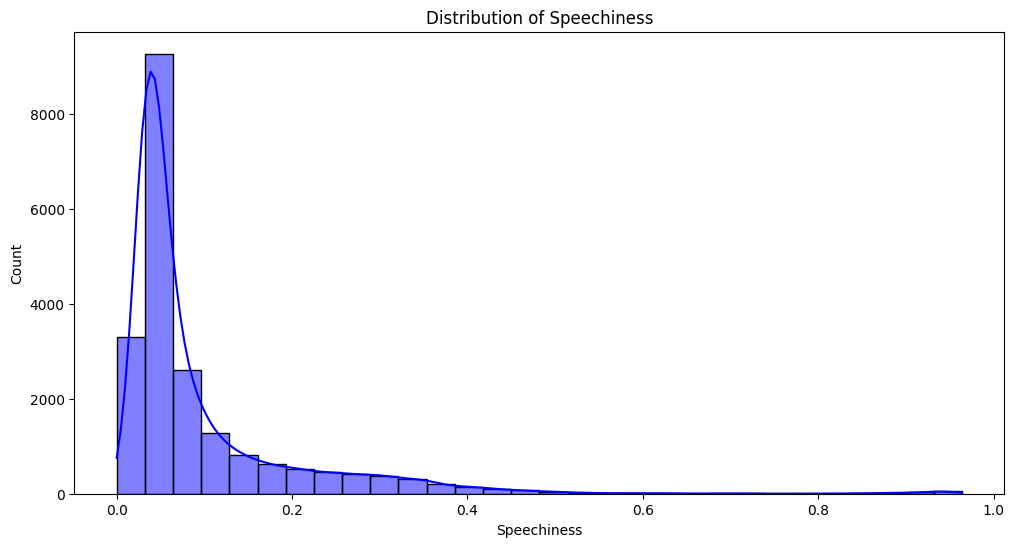

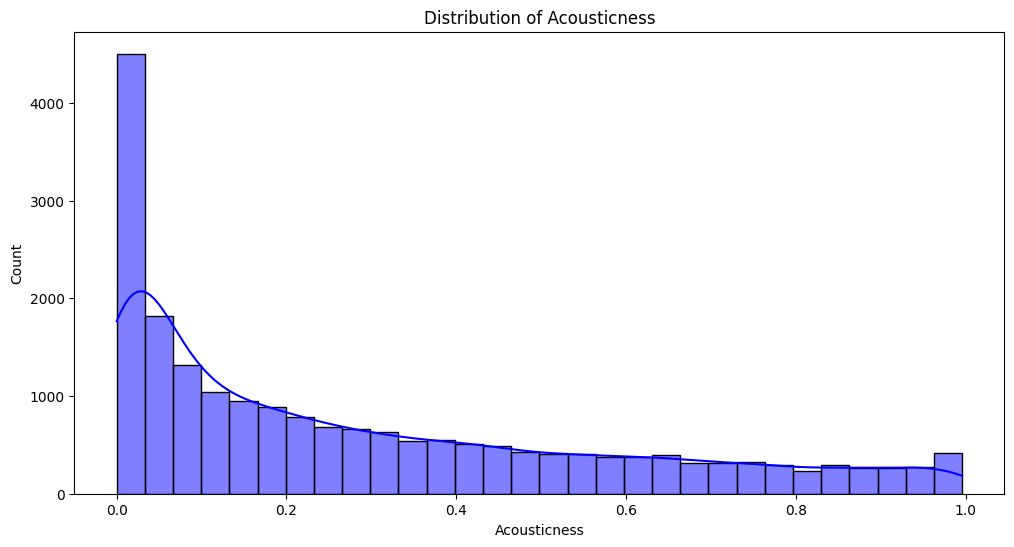

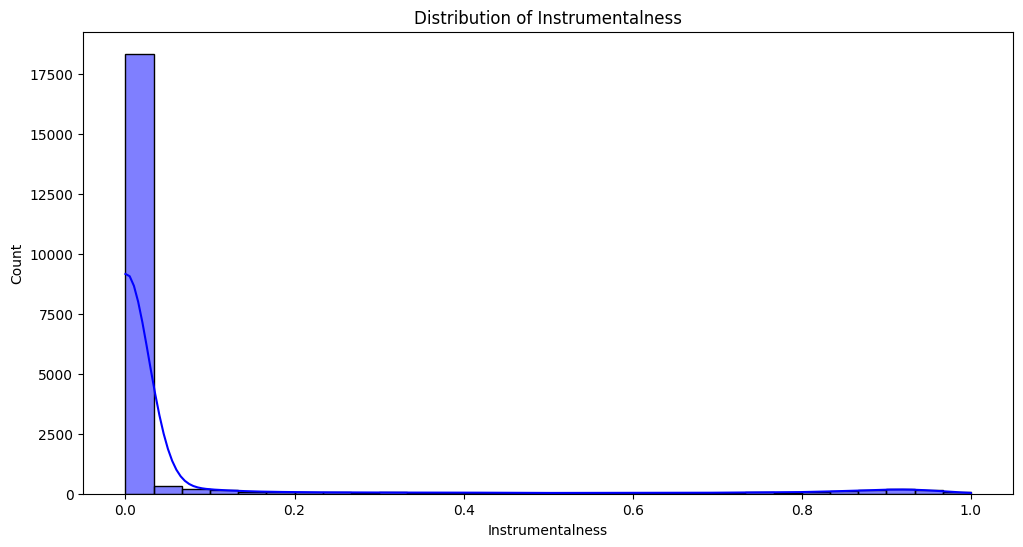

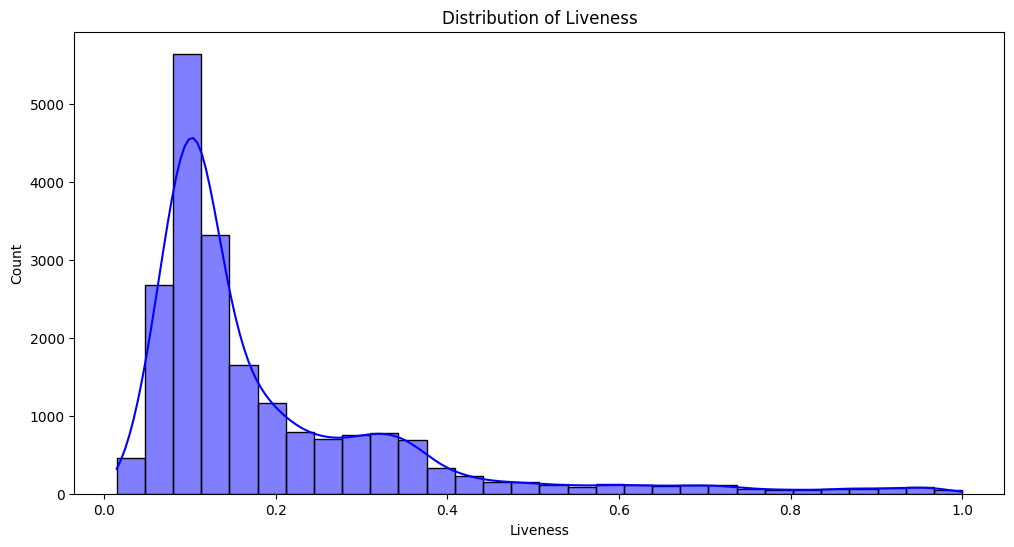

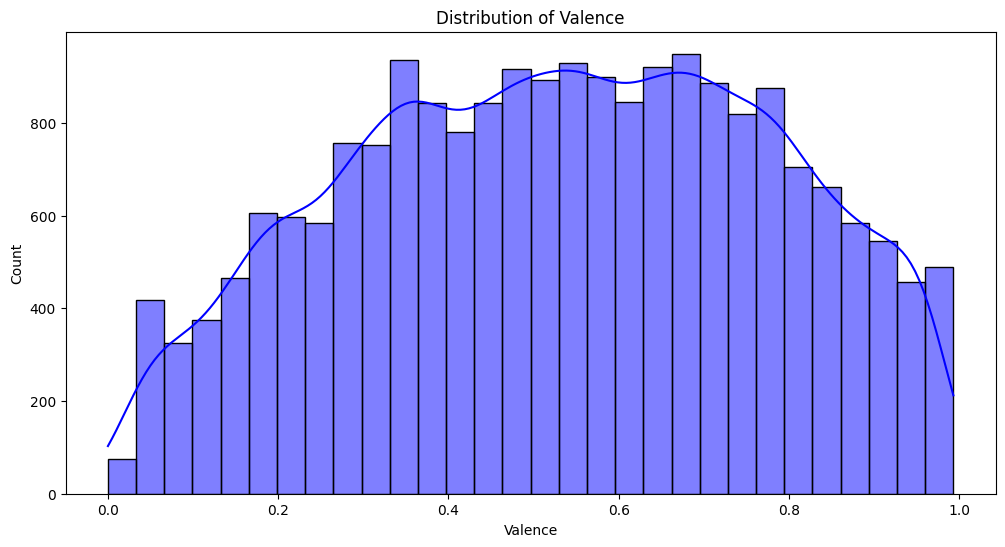

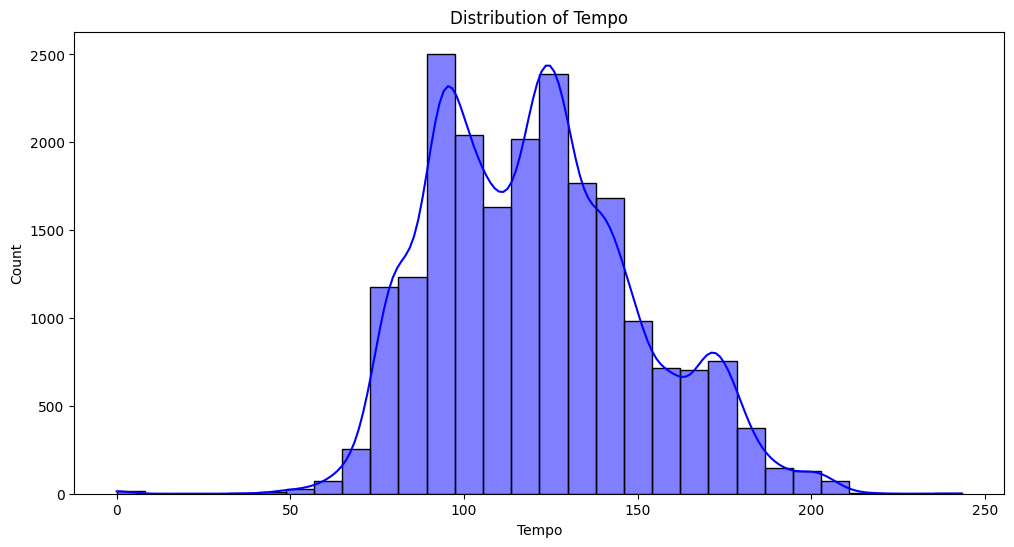

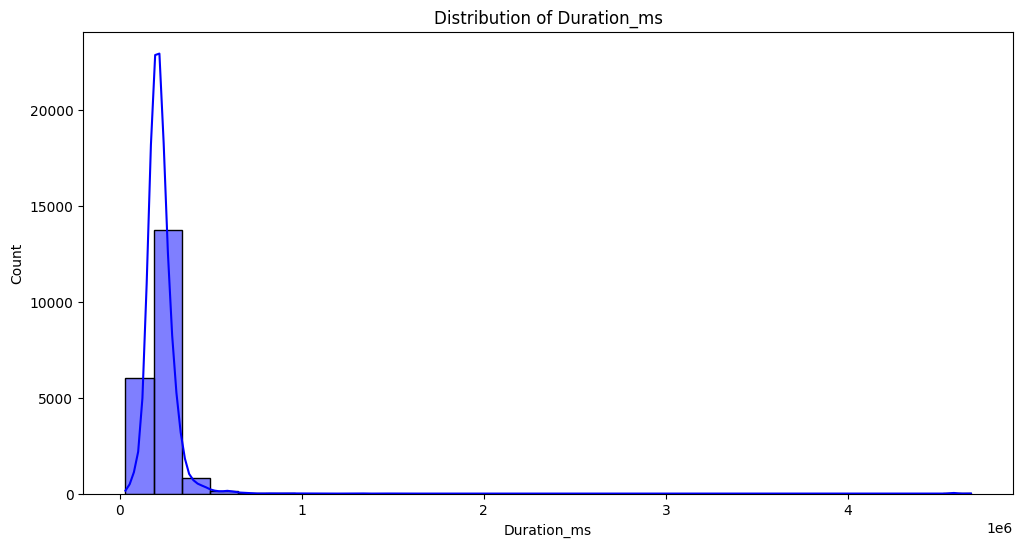

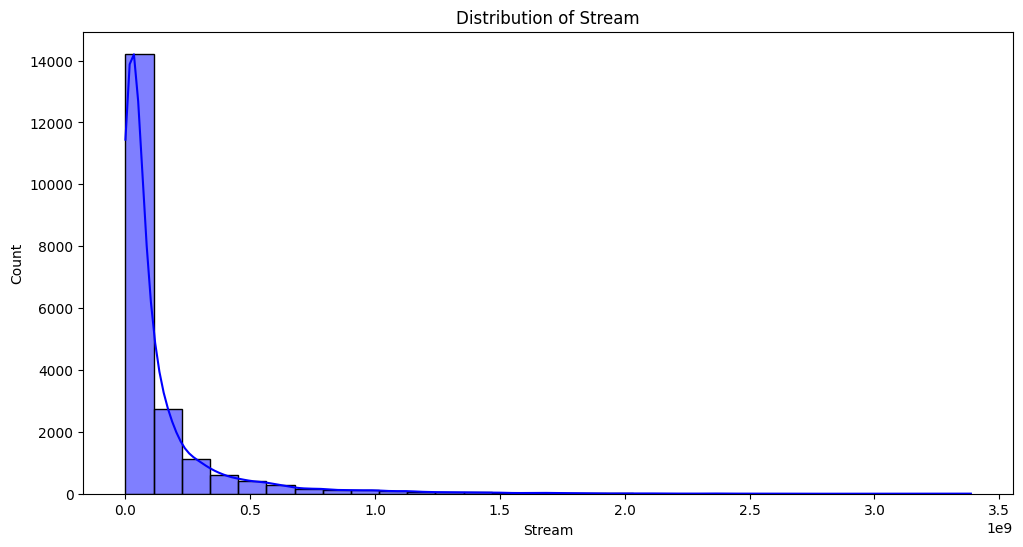

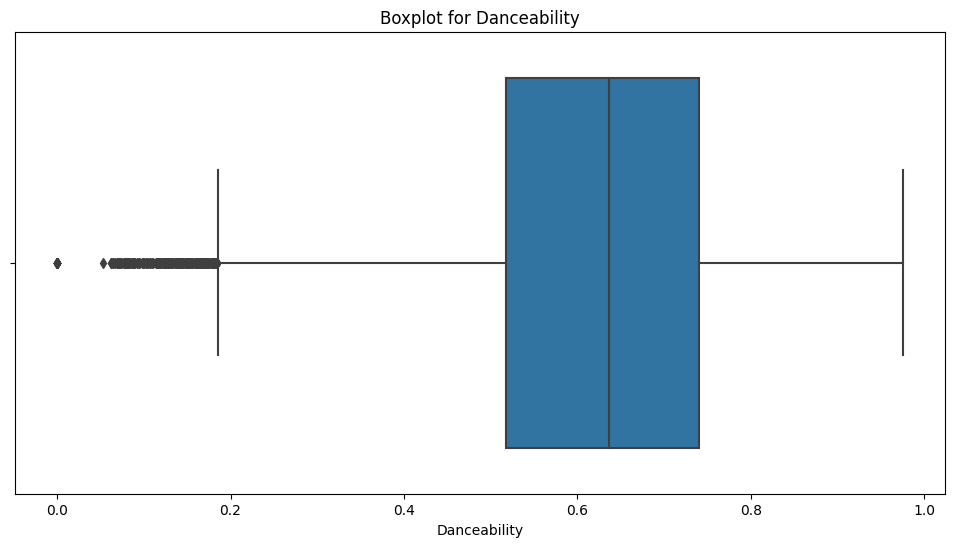

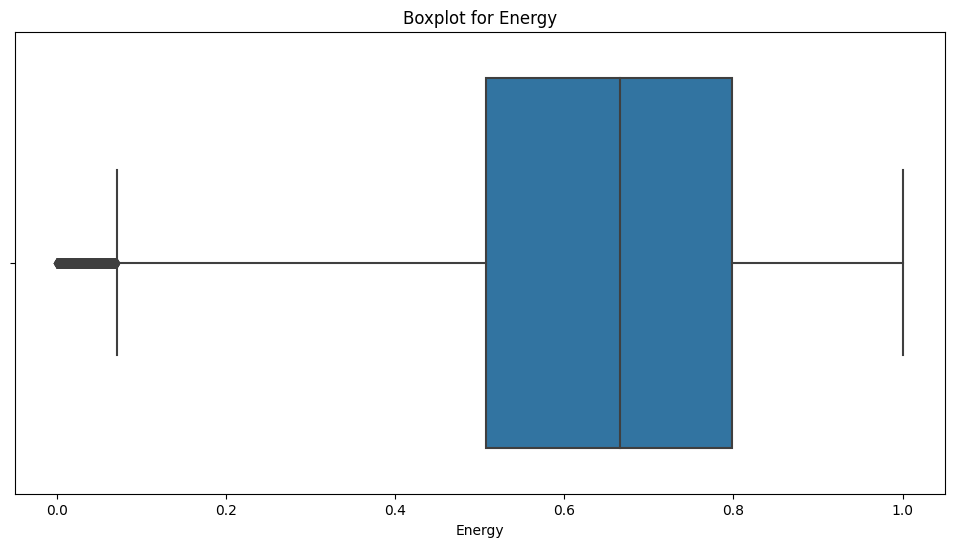

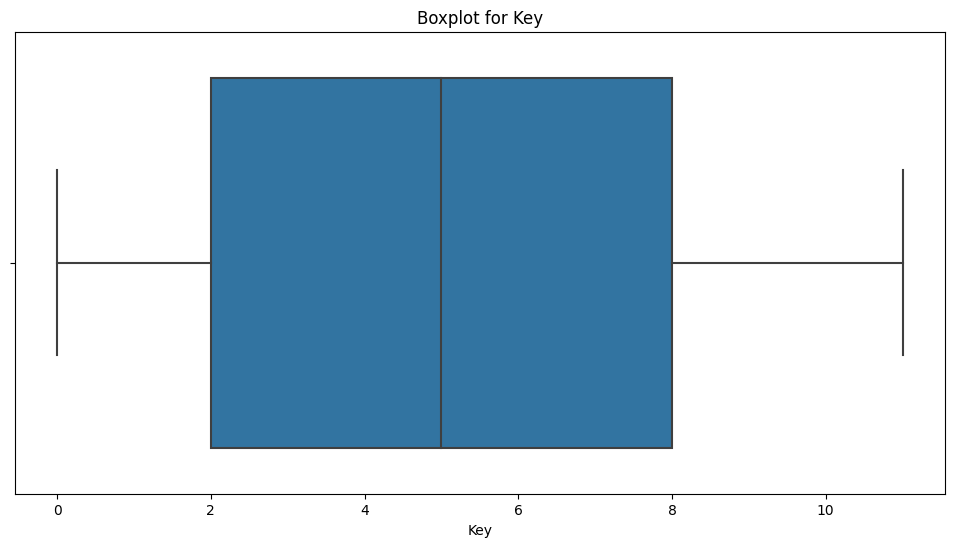

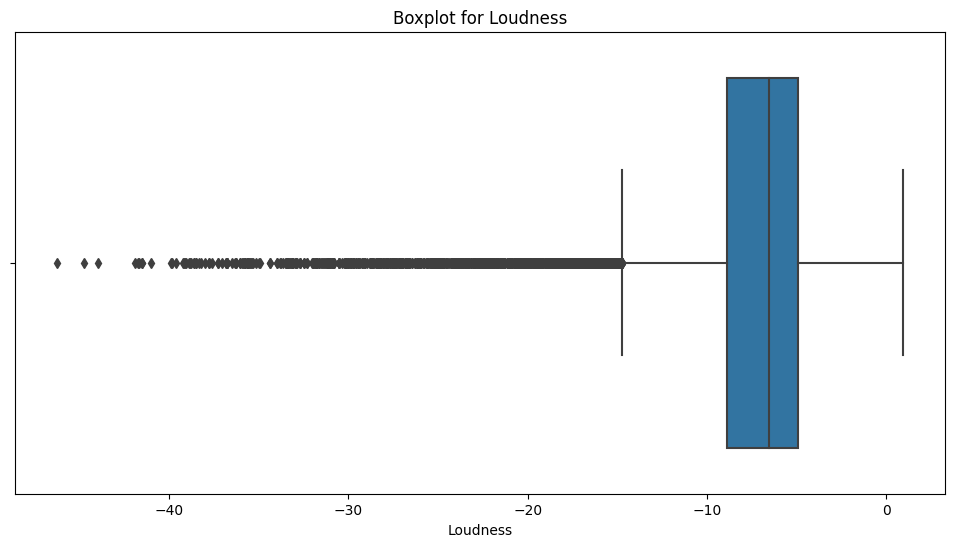

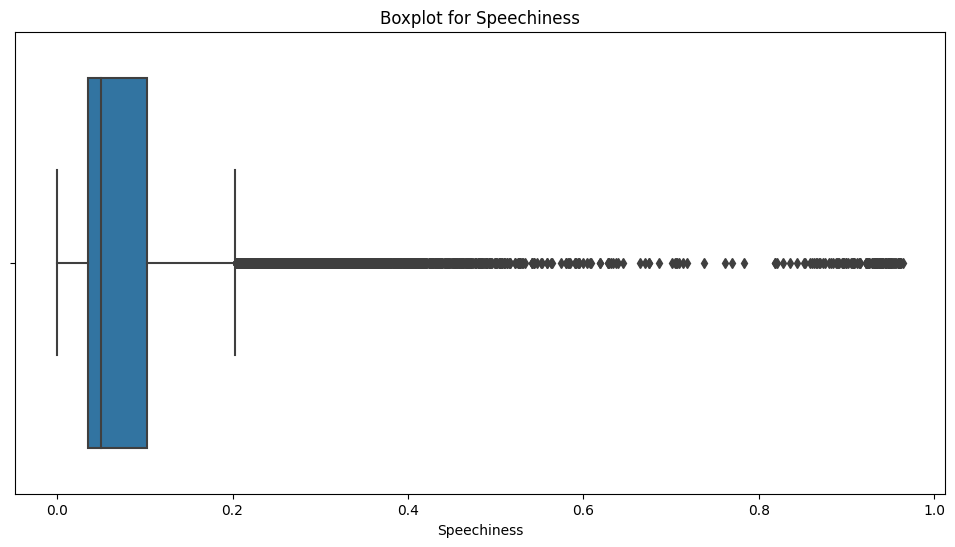

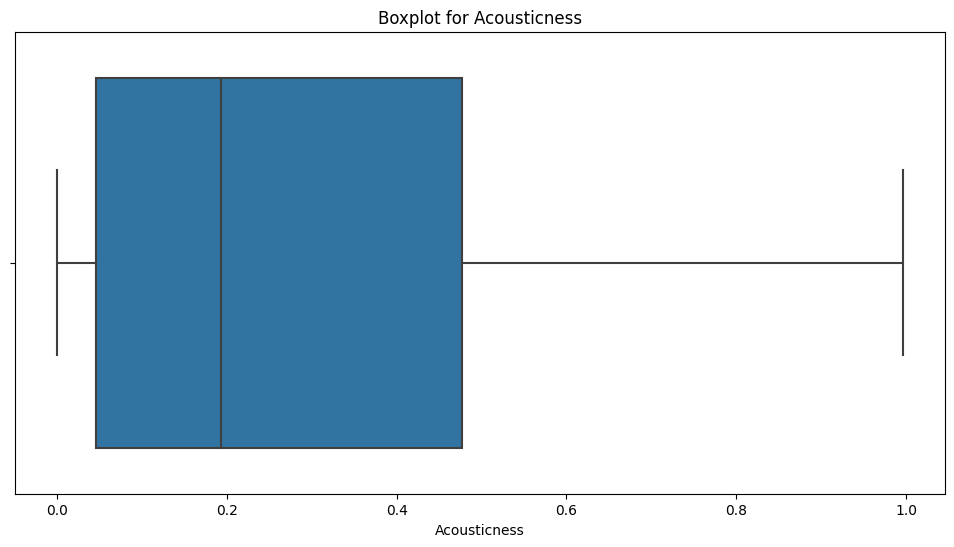

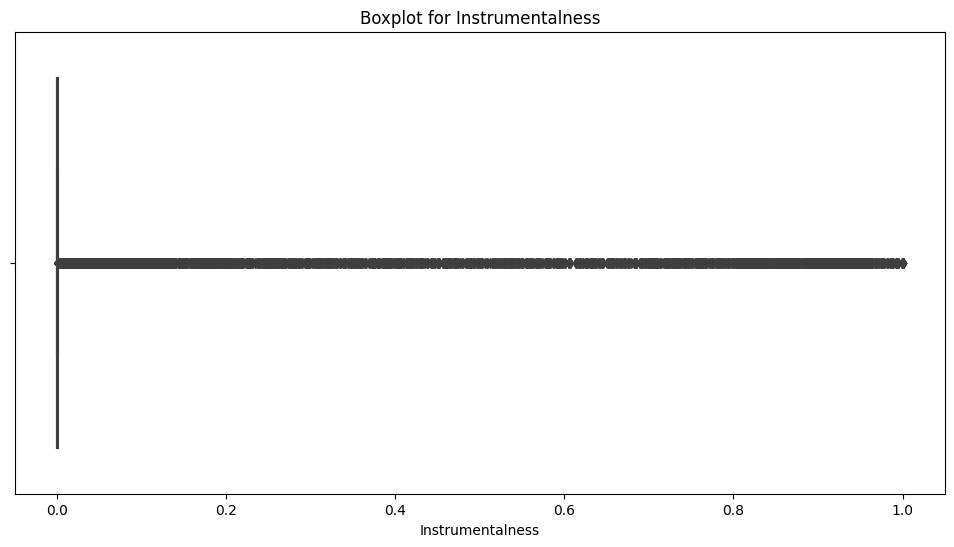

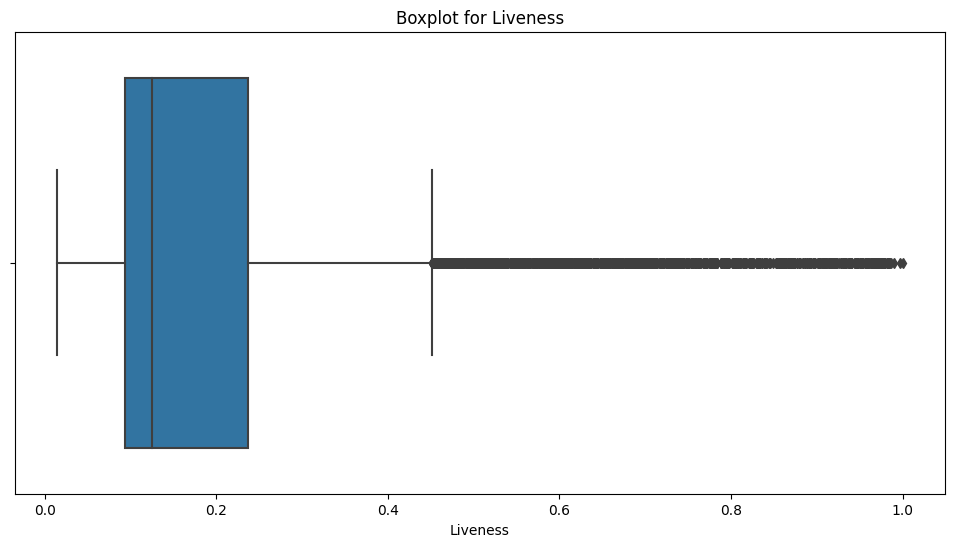

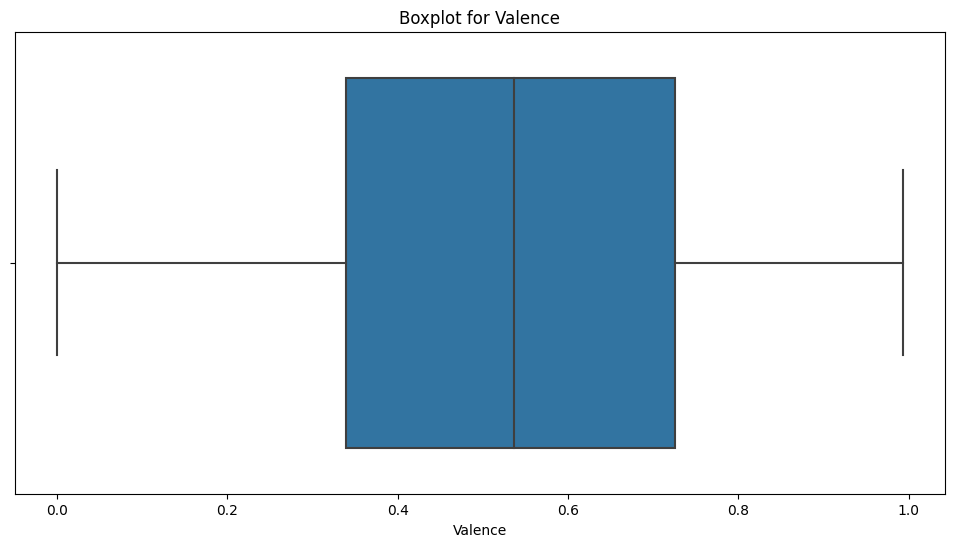

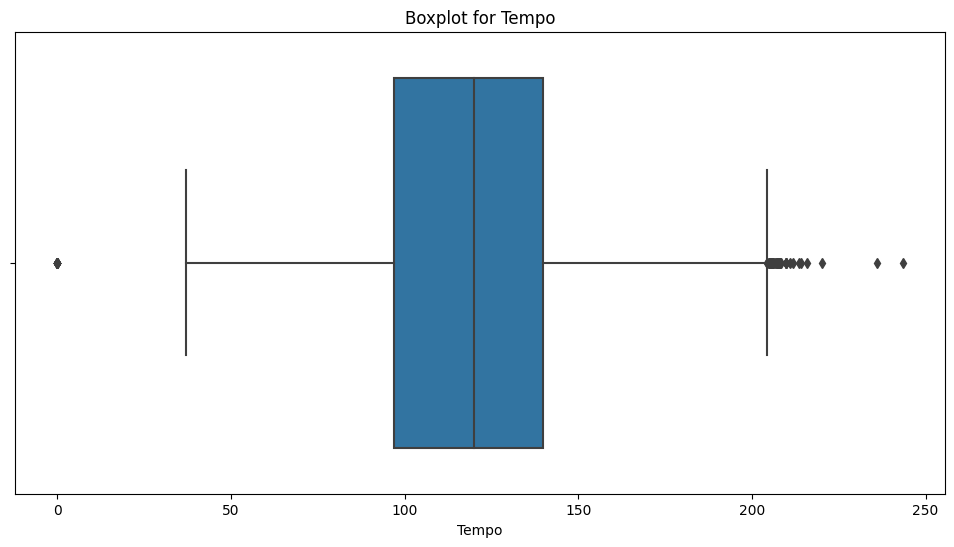

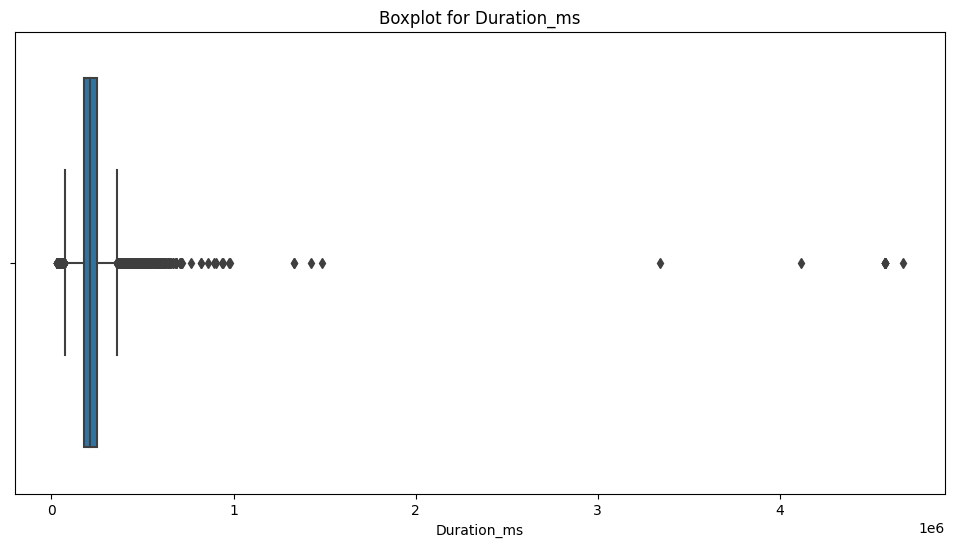

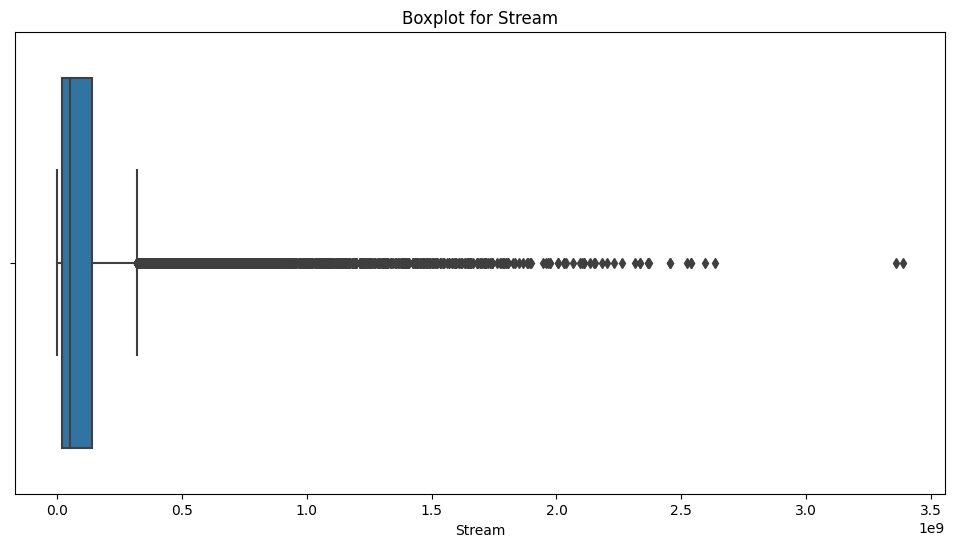

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data
print("Missing data for each column:")
print(df_filtered.isnull().sum())

# Summary statistics
print("\nSummary statistics for each column:")
print(df_filtered.describe())

# Plotting distributions of each column
for column in df_filtered.columns:
    plt.figure(figsize=(12, 6))
    plt.title(f"Distribution of {column}")
    sns.histplot(df_filtered[column], kde=True, color='blue', bins=30)
    plt.show()

# Checking for outliers with boxplots
for column in df_filtered.columns:
    plt.figure(figsize=(12, 6))
    plt.title(f"Boxplot for {column}")
    sns.boxplot(x=df_filtered[column])
    plt.show()


In [21]:
# Remove rows with missing values
df_filtered = df_filtered.dropna()




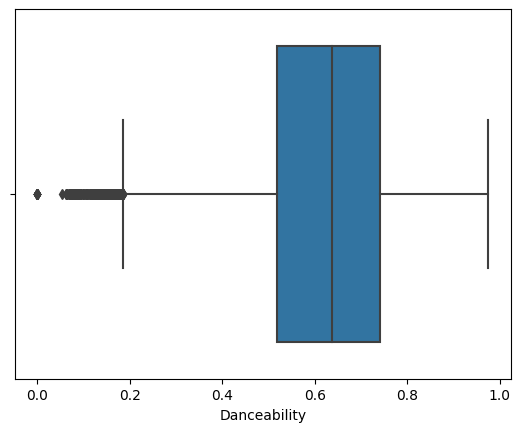

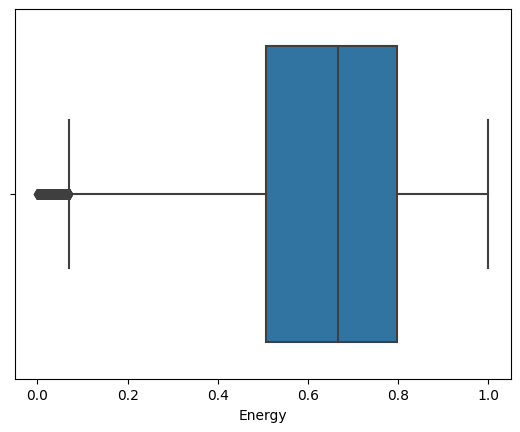

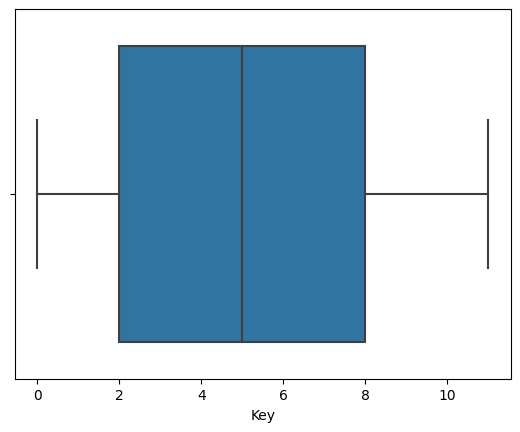

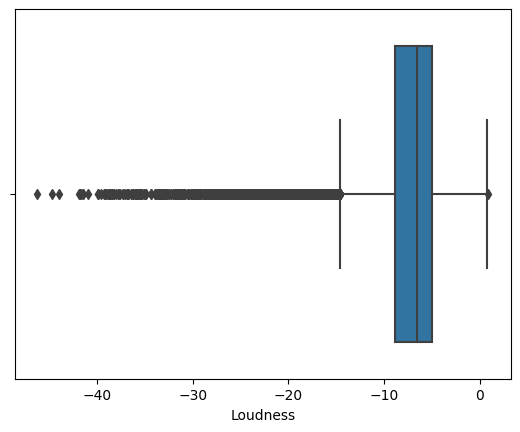

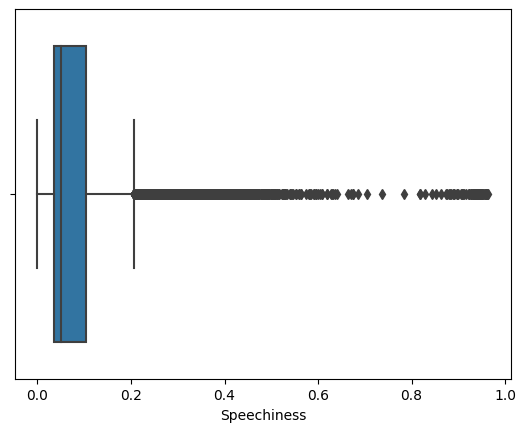

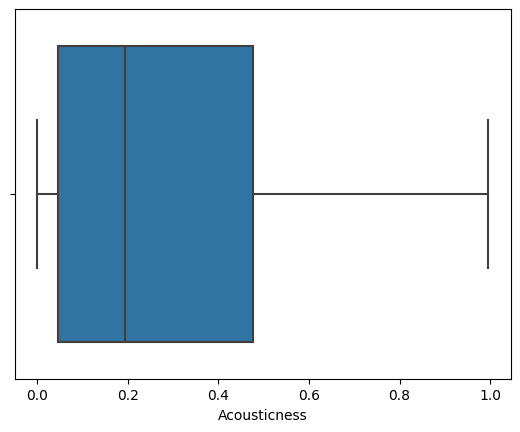

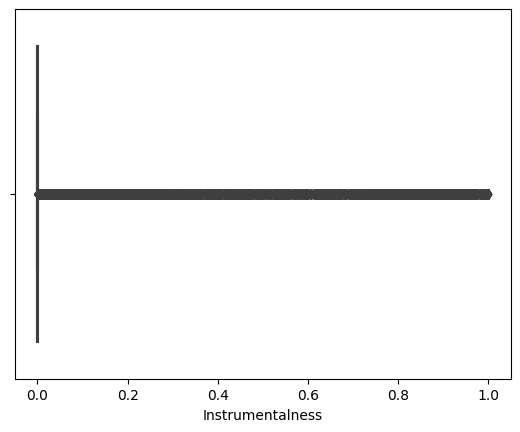

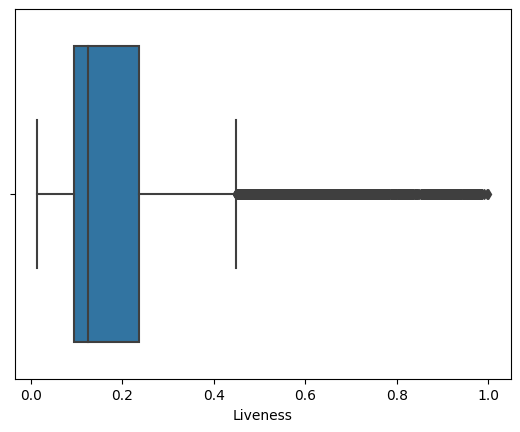

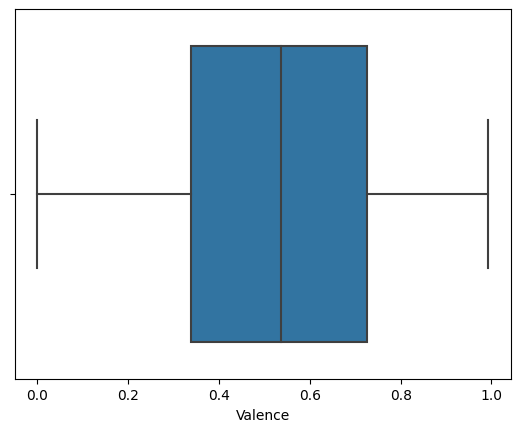

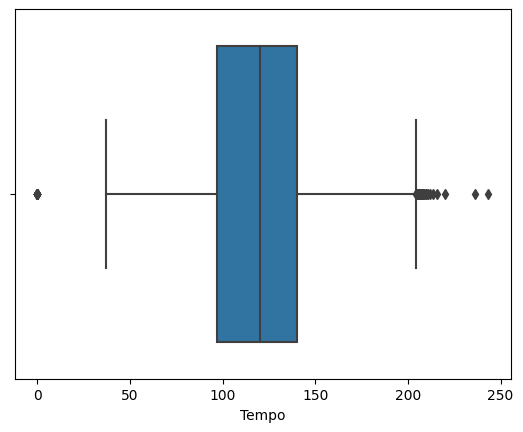

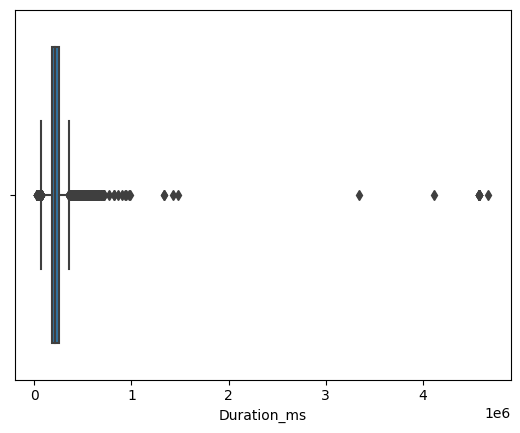

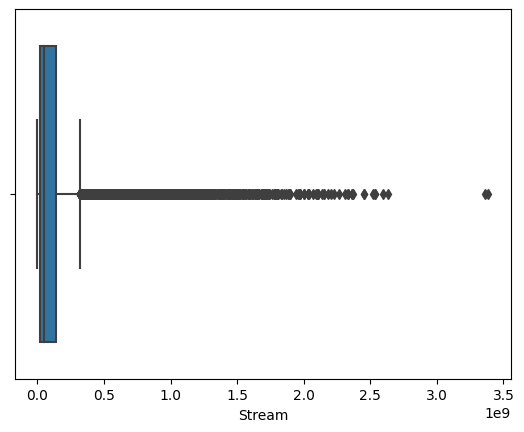

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a list of the column names to be plotted: num_cols
num_cols = df_filtered.select_dtypes(include='number').columns

# Create subplots for each column
for i in range(len(num_cols)):
    plt.figure(i)
    sns.boxplot(x=df_filtered[num_cols[i]])

plt.show()


In [23]:
outliers = df_filtered.select_dtypes(include='number').apply(lambda x: np.abs(x - x.mean()) > 3*x.std())
outlier_counts = outliers.sum().sort_values(ascending=False)
print(outlier_counts)


Instrumentalness    951
Liveness            601
Stream              520
Loudness            471
Speechiness         335
Danceability         97
Duration_ms          73
Tempo                28
Energy                0
Key                   0
Acousticness          0
Valence               0
dtype: int64


In [24]:
df_filtered

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [25]:
outliers = df_filtered.select_dtypes(include='number').apply(lambda x: np.abs(x - x.mean()) > 3*x.std())
df_filtered_no_outliers = df_filtered[~outliers.any(axis=1)]


In [26]:
df_filtered_no_outliers['Stream'].median().astype(int)

50934769

In [27]:
# mediana 50958279
df_filtered_no_outliers.loc[:, 'Stream_Above_Median'] = (df_filtered_no_outliers['Stream'] > df_filtered_no_outliers['Stream'].median()).astype(int)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10412\3529002200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers.loc[:, 'Stream_Above_Median'] = (df_filtered_no_outliers['Stream'] > df_filtered_no_outliers['Stream'].median()).astype(int)


In [28]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Calculate statistics
summary_stats = pd.DataFrame({
    'Mean': df_filtered_no_outliers.mean(),
    'Median': df_filtered_no_outliers.median(),
    'Max': df_filtered_no_outliers.max(),
    'Min': df_filtered_no_outliers.min(),
    'Kurtosis': df_filtered_no_outliers.apply(kurtosis),
    'Skewness': df_filtered_no_outliers.apply(skew)
})

# Display the dataframe
print(summary_stats)

                             Mean        Median           Max           Min   
Danceability         6.342913e-01  6.470000e-01  9.750000e-01      0.130000  \
Energy               6.513579e-01  6.730000e-01  9.980000e-01      0.025200   
Key                  5.300176e+00  5.000000e+00  1.100000e+01      0.000000   
Loudness            -6.997956e+00 -6.362000e+00  8.290000e-01    -21.524000   
Speechiness          8.913388e-02  5.060000e-02  4.160000e-01      0.022000   
Acousticness         2.695927e-01  1.790000e-01  9.920000e-01      0.000002   
Instrumentalness     1.502692e-02  1.690000e-06  6.330000e-01      0.000000   
Liveness             1.742862e-01  1.240000e-01  6.960000e-01      0.014500   
Valence              5.464461e-01  5.510000e-01  9.910000e-01      0.015400   
Tempo                1.211943e+02  1.199880e+02  2.085000e+02     37.114000   
Duration_ms          2.218241e+05  2.141490e+05  6.010000e+05  30985.000000   
Stream               1.112439e+08  5.093477e+07  8.6

In [38]:

df_scoring = df_filtered_no_outliers.sample(n=1000, replace=False)
df_model = df_filtered_no_outliers.drop(df_scoring.index)



In [63]:
# jakaś pierwsza sieć
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = df_model.drop(columns=['Stream_Above_Median',"Stream"])
y = df_model['Stream_Above_Median']

# Create a StandardScaler instance (sprawdzić co to robi)
scaler = StandardScaler()

# Fit the StandardScaler
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of features
n_features = X_train.shape[1]

# Create the model
model = Sequential()
model.add(Dense(12, input_dim=n_features, activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Predict
predictions = model.predict(X_test)

# Convert predictions to binary labels
predictions = [1 if p > 0.5 else 0 for p in predictions]


Epoch 1/100
333/333 [==============================] - 2s 3ms/step - loss: 2909.2129 - accuracy: 0.5038 - val_loss: 70.1997 - val_accuracy: 0.4838
Epoch 2/100
333/333 [==============================] - 1s 3ms/step - loss: 79.1885 - accuracy: 0.5086 - val_loss: 23.9348 - val_accuracy: 0.4838
Epoch 3/100
333/333 [==============================] - 1s 2ms/step - loss: 90.2543 - accuracy: 0.4951 - val_loss: 143.1798 - val_accuracy: 0.5162
Epoch 4/100
333/333 [==============================] - 1s 2ms/step - loss: 75.5937 - accuracy: 0.5070 - val_loss: 63.5523 - val_accuracy: 0.5162
Epoch 5/100
333/333 [==============================] - 1s 2ms/step - loss: 70.0076 - accuracy: 0.5070 - val_loss: 19.0869 - val_accuracy: 0.4838
Epoch 6/100
333/333 [==============================] - 1s 2ms/step - loss: 71.4354 - accuracy: 0.4959 - val_loss: 78.1959 - val_accuracy: 0.5162
Epoch 7/100
333/333 [==============================] - 1s 3ms/step - loss: 66.9143 - accuracy: 0.4984 - val_loss: 134.0890 - va

In [48]:
# Evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


416/416 [==============================] - 1s 1ms/step - loss: 0.6699 - accuracy: 0.5917

accuracy: 59.17%


In [62]:
X_scaled

array([[ 0.39439065,  1.41030274, -1.20221131, ...,  0.0180036 ,
        -0.45257661, -0.10431603],
       [ 0.35510062,  0.45566074, -0.92310434, ...,  0.13206622,
        -0.02364662,  0.19938866],
       [ 0.18484383,  0.22218851,  1.30975141, ..., -0.09183449,
         1.61927726,  1.93644578],
       ...,
       [-0.34557157,  1.42586755, -0.08578343, ...,  0.47002957,
        -1.07518012, -2.05929023],
       [-0.67953682,  1.47775027, -0.3648904 , ...,  0.46580503,
         1.85833599, -1.14754334],
       [-1.25579058,  0.92779347, -0.3648904 , ..., -0.53963592,
         1.63431349, -1.37495271]])

In [60]:
#test 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = df_model.drop(columns=['Stream_Above_Median',"Stream"])
y = df_model['Stream_Above_Median']

# Create a StandardScaler instance (sprawdzić co to robi)
scaler = StandardScaler()

# Fit the StandardScaler
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the number of features
n_features = X_train.shape[1]

# Create the model
model = Sequential()
model.add(Dense(12, input_dim=n_features, activation='softmax')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2)

# Predict
predictions = model.predict(X_test)

# Convert predictions to binary labels
predictions = [1 if p > 0.5 else 0 for p in predictions]


Epoch 1/50
167/167 [==============================] - 1s 4ms/step - loss: 0.6966 - accuracy: 0.4824 - val_loss: 0.6946 - val_accuracy: 0.4831
Epoch 2/50
167/167 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4704 - val_loss: 0.6946 - val_accuracy: 0.4827
Epoch 3/50
167/167 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.4763 - val_loss: 0.6943 - val_accuracy: 0.4804
Epoch 4/50
167/167 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4730 - val_loss: 0.6943 - val_accuracy: 0.4759
Epoch 5/50
167/167 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4915 - val_loss: 0.6938 - val_accuracy: 0.4714
Epoch 6/50
167/167 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.4815 - val_loss: 0.6936 - val_accuracy: 0.4767
Epoch 7/50
167/167 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5064
Epoch 

In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the number of features
n_features = X_train.shape[1]

# Lists of hyperparameters to try out
optimizers_list = ['adam', 'rmsprop', 'sgd']
batch_sizes = [32, 64, 128]
epochs_list = [50, 100, 150]

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

for opt in optimizers_list:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            print(f"Training with optimizer={opt}, batch_size={batch_size}, epochs={epochs}")
            
            # Create the model
            model = Sequential()
            model.add(Dense(12, input_dim=n_features, activation='relu')) 
            model.add(Dense(8, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))

            # Compile the model
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

            # Fit the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

            # Predict probabilities
            y_pred_prob = model.predict(X_test)

            # Compute AUC score
            auc = roc_auc_score(y_test, y_pred_prob)
            print(f'Opt:{opt}, Batch_size:{batch_size}, Epochs:{epochs}, AUC:{auc}')
            results_df = results_df.append({'optimizer': opt, 'batch_size': batch_size, 'epochs': epochs, 'AUC': auc}, ignore_index=True)


Training with optimizer=adam, batch_size=32, epochs=50
Epoch 1/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5244 - val_loss: 0.6914 - val_accuracy: 0.5286
Epoch 2/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5377 - val_loss: 0.6897 - val_accuracy: 0.5436
Epoch 3/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5522 - val_loss: 0.6893 - val_accuracy: 0.5440
Epoch 4/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.5576 - val_loss: 0.6898 - val_accuracy: 0.5523
Epoch 5/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5633 - val_loss: 0.6894 - val_accuracy: 0.5493
Epoch 6/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.5677 - val_loss: 0.6894 - val_accuracy: 0.5493
Epoch 7/50
333/333 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 

In [66]:
# Evaluate model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


416/416 [==============================] - 1s 1ms/step - loss: 0.6843 - accuracy: 0.5566
Training Loss: 0.6842502951622009
Training Accuracy: 0.5565838813781738
104/104 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5360
Test Loss: 0.6887471675872803
Test Accuracy: 0.5359615087509155
